In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Leak #1
# No leak before s/d
#start_date = '2013-01-24'; end_date = '2013-01-31'
#start_date = '2013-02-27'; end_date = '2013-03-01'
#start_date = '2013-03-16'; end_date = '2013-03-19'
# Leak start
#start_date = '2013-03-27'; end_date = '2013-04-01'
#start_date = '2013-04-10'; end_date = '2013-04-13'
# Stable leak
#start_date = '2013-04-26'; end_date = '2013-04-30'
#start_date = '2013-05-12'; end_date = '2013-05-17'
# No leak after s/d
#start_date = '2013-06-01'; end_date = '2013-06-10'

In [3]:
# Leak #2
# No leak before s/d
#start_date = '2013-06-23'; end_date = '2013-07-15'
# Leak start
#start_date = '2013-07-19'; end_date = '2013-07-22'
# Stable leak
#start_date = '2013-08-01'; end_date = '2013-08-17'
#start_date = '2013-08-24'; end_date = '2013-09-13'
#start_date = '2013-09-28'; end_date = '2013-10-10'
# No leak after s/d
#start_date = '2013-10-27'; end_date = '2013-11-18'
#start_date = '2013-12-01'; end_date = '2013-12-21'

In [4]:
# Mini leak test period
#start_date = '2013-04-27'; end_date = '2013-04-28'
# Leak start period
#start_date = '2013-07-19'; end_date = '2013-07-22'

In [5]:
# Helium leak test period
#start_date = '2013-09-17'; end_date = '2013-09-20'

In [6]:
# Few days in 2015 data set
#start_date = '2015-08-15'; end_date = '2015-08-17'

In [7]:
# Leak2 chosen dates
#start_date = '2013-06-30'; end_date = '2013-12-30'

In [8]:
# Leak1 chosen dates
start_date = '2013-01-24'; end_date = '2013-06-10'

In [9]:
# No Leak chosen dates
#start_date = '2013-10-27'; end_date = '2013-12-21'

In [10]:
# Leak start chosen dates
#start_date = '2013-06-23'; end_date = '2013-08-01';

In [11]:
print(start_date, end_date)

2013-01-24 2013-06-10


### Stoichiometric Information

In [12]:
species = np.array(['C1', 'C2', 'C3', 'C4', 'N2'])
species

array(['C1', 'C2', 'C3', 'C4', 'N2'],
      dtype='<U2')

In [13]:
atoms=np.array(['H', 'C', 'N'])
atoms

array(['H', 'C', 'N'],
      dtype='<U1')

In [14]:
# Atomic mass vector - Rows are H C N
A = np.array([[1.00794], [12.0107], [14.0067]])
print(A)

[[  1.00794]
 [ 12.0107 ]
 [ 14.0067 ]]


In [15]:
# Chemical formula matrix - Columns are H C N
# Row are C1, C2, C3, C4, N2
F = np.array([[4, 1, 0],
     [6, 2, 0],
     [8, 3, 0],
     [10, 4, 0],
     [0, 0, 2]])
print(F)

[[ 4  1  0]
 [ 6  2  0]
 [ 8  3  0]
 [10  4  0]
 [ 0  0  2]]


In [16]:
M = F @ A
print(M)

[[ 16.04246]
 [ 30.06904]
 [ 44.09562]
 [ 58.1222 ]
 [ 28.0134 ]]


### Loading the data file

In [17]:
#df = pd.read_excel('MCHE_Plant_Data_2015.xlsx', index_col='Time')
df = pd.read_excel('MCHE_Plant_Data_2013.xlsx', index_col='Time')

In [18]:
winval = 6*24
df = df.rolling(window=winval).mean()
df = df.iloc[winval:]

In [19]:
df.head()

,BleedL_CV,BleedL,BleedH_CV,BleedH,VC1,VN2,VC2,VC2corr,VC3,VC3corr,...,xEFVC3,xEFViC4,xEFVnC4,NG1,NG2,DeM1,DeM2,BufferGas,SpareFlare,ShroudVent
Time,,,,,,,,,,,,,,,,,,,,,
2013-01-02 00:00:00,0.0,0.0,0.025208,0.230972,0.235585,0.071953,0.159442,0.0,0.019967,0.140301,...,0.0189985,0.0040006,0.00450644,4202.990314,4254.020879,64.694162,50.3768,294.100685,0.278470,7.210965
2013-01-02 00:10:00,0.0,0.0,0.024097,0.221111,0.235585,0.071834,0.158342,0.0,0.019981,0.139596,...,0.0190399,0.00400676,0.0044977,4208.917757,4259.898098,64.622719,43.0474,294.116780,0.282598,7.192418
2013-01-02 00:20:00,0.0,0.0,0.023056,0.211458,0.236190,0.071844,0.157236,0.0,0.019992,0.139047,...,0.0193521,0.00417481,0.00473293,4214.651009,4265.046378,64.463243,34.4104,294.150846,0.286805,7.172123
2013-01-02 00:30:00,0.0,0.0,0.022014,0.202014,0.238179,0.072229,0.156913,0.0,0.019998,0.138715,...,0.0203752,0.00432972,0.00495231,4221.279885,4270.944747,64.361293,43.8946,294.178826,0.290264,7.150095
2013-01-02 00:40:00,0.0,0.0,0.020972,0.192778,0.721836,0.099305,0.156913,0.0,0.020000,0.138616,...,0.0210042,0.00451974,0.00522499,4228.854567,4278.211183,64.360741,60.0752,294.184128,0.290714,7.127210


In [20]:
df.shape

(52272, 51)

In [21]:
# Subsetting a select period
df = df[start_date:end_date]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19872 entries, 2013-01-24 00:00:00 to 2013-06-10 23:50:00
Data columns (total 51 columns):
BleedL_CV     19872 non-null float64
BleedL        19872 non-null float64
BleedH_CV     19872 non-null float64
BleedH        19872 non-null float64
VC1           19872 non-null float64
VN2           19872 non-null float64
VC2           19872 non-null float64
VC2corr       19872 non-null float64
VC3           19872 non-null float64
VC3corr       19872 non-null float64
LC2           19872 non-null float64
LC3           19872 non-null float64
LC4           19872 non-null float64
MRVa          19872 non-null float64
MRVb          19872 non-null float64
MRVc          19872 non-null float64
xMRVN2        19872 non-null object
xMRVC1        19872 non-null object
xMRVC2        19872 non-null object
xMRVC3        19872 non-null object
xMRVC4ppm     19872 non-null object
HMR1          19872 non-null float64
HMR2          19872 non-null float64
xHMRN2    

In [22]:
# Some features which are object type are coerced to float
obj_list = (df.dtypes == object)
for i in range(len(obj_list)):
    if obj_list[i]:
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')

In [23]:
# Clubbing EFV iC4 and nC4
df['xEFVC4'] = df['xEFViC4'] + df['xEFVnC4']

In [24]:
# Converting MRV C4 from ppm to mole percent
df['xMRVC4'] = df['xMRVC4ppm'] / 10000 # use this only for 2013 data set
# mol% directly given by Sandeep for 2015 data set

In [25]:
df.describe()

,BleedL_CV,BleedL,BleedH_CV,BleedH,VC1,VN2,VC2,VC2corr,VC3,VC3corr,...,xEFVnC4,NG1,NG2,DeM1,DeM2,BufferGas,SpareFlare,ShroudVent,xEFVC4,xMRVC4
count,1.987200e+04,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000,1.987200e+04,...,19858.000000,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000,19858.000000,19871.000000
mean,1.589251e+01,2200.999286,2.269525,25.748836,1.372296,23.547240,19.131389,7.961129,6.666643,4.728103e+00,...,0.004617,8275.968221,8258.446380,83.287730,78.453534,297.308313,66.160426,62.442999,0.008553,0.413843
std,2.176881e+01,3015.201630,1.873192,24.589910,2.809646,32.142976,18.564108,11.990828,11.789665,6.588123e+00,...,0.000863,2105.936104,2122.818666,32.904827,33.603903,48.840241,105.825525,101.832499,0.001685,0.138492
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.083673e-14,...,0.000002,149.395596,41.026157,0.000000,0.000000,6.206589,0.145913,0.004702,0.000006,0.000000
25%,5.465463e-16,0.000000,0.905608,9.179549,0.000000,1.175225,4.606171,0.525278,0.207518,1.105338e+00,...,0.004511,8345.094921,8264.216772,66.676641,62.111764,300.964887,1.201455,7.061895,0.008359,0.317773
50%,8.968750e-02,12.665208,1.947674,20.575069,0.084374,1.975003,10.577787,1.588646,0.901415,2.475214e+00,...,0.004671,8661.189325,8619.851833,75.540758,73.679789,301.539575,3.965800,12.647066,0.008637,0.375596
75%,3.737875e+01,5191.136701,3.037257,32.611354,2.060448,65.237660,38.061155,15.035747,8.251396,5.732737e+00,...,0.004825,9327.948149,9361.219121,106.340414,93.722148,301.957291,157.094226,170.904214,0.008918,0.500000
max,8.589549e+01,8217.410278,10.616667,152.353333,27.051467,79.008164,66.082069,73.611944,65.332578,4.594345e+01,...,0.029757,9545.837959,9588.071088,156.038786,162.898856,354.911490,316.543834,825.671056,0.052001,1.499998


### Building the mass flow rates

In [26]:
# Initialize an empty dataframe for mass flow rates
mdot = pd.DataFrame(index=df.index)

# NG and De-methanizer flows, in t/d units
mdot['NG1'] = df['NG1']
mdot['NG2'] = df['NG2']
mdot['NG'] = mdot['NG1'] + mdot['NG2']

mdot['DeM1'] = df['DeM1']
mdot['DeM2'] = df['DeM2']
mdot['DeM'] = mdot['DeM1'] + mdot['DeM2']

# End Flash Vessel flow
mdot['EFV'] = df['EFV']

# HMR flows, in t/d units
mdot['HMR1'] = df['HMR1']
mdot['HMR2'] = df['HMR2']
mdot['HMR'] = mdot['HMR1'] + mdot['HMR2']

# LMR flows, in t/d units
mdot['LMR1'] = df['LMR1']
mdot['LMR2'] = df['LMR2']
mdot['LMR3'] = df['LMR3']
mdot['LMR4'] = df['LMR4']
mdot['LMR'] = mdot['LMR1'] + mdot['LMR2'] + mdot['LMR3'] + mdot['LMR4']

# MRV flows are in kg/s units convert to t/d
mdot['MRVa'] = df['MRVa']*(3600*24/1000)
mdot['MRVb'] = df['MRVb']*(3600*24/1000)
mdot['MRVc'] = df['MRVc']*(3600*24/1000)
mdot['MRV'] = (mdot['MRVa'] + mdot['MRVb'] + mdot['MRVc'])/3.0

# Vapor make-up flows, in t/d units
mdot['VN2'] = df['VN2']
mdot['VC1'] = df['VC1']
mdot['VC2'] = df['VC2']
mdot['VC3'] = df['VC3']
mdot['Vap'] = mdot['VN2'] + mdot['VC1'] + mdot['VC2'] + mdot['VC3']

# Liquid make-up flows, in t/d units
mdot['LC2'] = df['LC2'] # set to zero for 2015 data set, as per Sandeep
mdot['LC3'] = df['LC3'] # set to zero for 2015 data set, as per Sandeep
mdot['LC4'] = df['LC4']
mdot['Liq'] = mdot['LC2'] + mdot['LC3'] + mdot['LC4']

# Total make-up flow
mdot['Mkup'] = mdot['Vap'] + mdot['Liq']

# Bleed streams in kg per 10 minutes units converted to t/d
mdot['BleedL'] = df['BleedL']*(6*24/1000)
mdot['BleedH'] = df['BleedH']*(6*24/1000)

# LMR Bleed new recipe #########
#mdot['BleedL'] = df['SpareFlare']

# MRL flow estimate
mdot['MRL'] = mdot['MRV'] + mdot['Liq']
mdot['MRLchk'] = mdot['LMR'] + mdot['BleedL'] + mdot['HMR'] + mdot['BleedH']

# Total bleed flow
mdot['Bleed'] = mdot['BleedL'] + mdot['BleedH']

# Leak estimate from Bleeds & make-ups: Leak = BleedL + BleedH - Vap - Liq 
#mdot['Leak'] = np.abs(mdot['Bleed'] - mdot['Mkup'])
mdot['Leak'] = mdot['Bleed'] - mdot['Mkup']

# Cumulative Bleed & Make-up (t/d converted to t/10mins and accumulated)
mdot['cumBleed'] = mdot.Bleed.cumsum()/(24*6)
mdot['cumMkup'] = mdot.Mkup.cumsum()/(24*6)

### Total Bleed and Total Make-up check

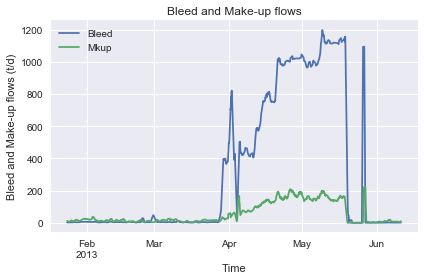

,Bleed,Mkup
count,19872.000000,1.987200e+04
mean,320.651730,5.640570e+01
std,435.266093,6.521470e+01
min,0.000000,4.366766e-14
25%,2.861215,8.338274e+00
50%,5.815080,1.761683e+01
75%,752.443380,1.269768e+02
max,1198.076210,2.248166e+02


In [27]:
# Total Bleed and Make-up flows plots & descriptors
mdot[['Bleed','Mkup']].plot()
plt.ylabel('Bleed and Make-up flows (t/d)')
plt.title('Bleed and Make-up flows')
plt.tight_layout()
plt.savefig('Bleed_Mkup.png', dpi = 300)
plt.show()
mdot[['Bleed','Mkup']].describe()

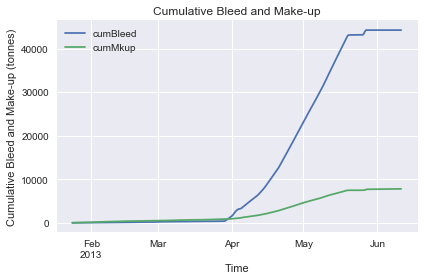

,cumBleed,cumMkup
count,19872.000000,19872.000000
mean,13911.308590,2798.587700
std,17362.426289,2881.490662
min,0.016015,0.082451
25%,160.754719,472.203909
50%,2868.175425,1031.540620
75%,29622.347094,5576.929533
max,44249.938681,7783.987024


In [28]:
# Cumulative Bleed and Make-up plots & descriptors
mdot[['cumBleed','cumMkup']].plot()
plt.ylabel('Cumulative Bleed and Make-up (tonnes)')
plt.title('Cumulative Bleed and Make-up')
plt.tight_layout()
plt.savefig('cum_Bleed_Mkup.png', dpi = 300)
plt.show()
mdot[['cumBleed','cumMkup']].describe()

### EFV stream

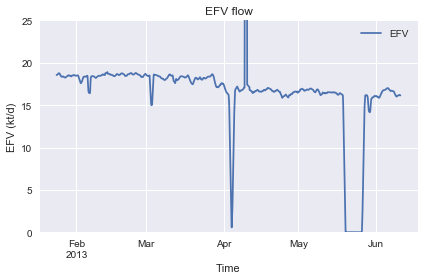

,EFV
count,19872.000000
mean,16.373670
std,4.325364
min,0.007763
25%,16.487038
50%,17.016600
75%,18.410900
max,27.793615


In [29]:
# EFV flow plot & descriptors
(mdot[['EFV']]/1000).plot()
plt.ylim((0,25))
plt.ylabel('EFV (kt/d)')
plt.title('EFV flow')
plt.tight_layout()
plt.savefig('EFV.png', dpi = 300)
plt.show()
(mdot[['EFV']]/1000).describe()

In [30]:
# EFV composition was computed using PVT calculations, so adds up to 1.0 cleanly.
# EFV Composition: N2, C1, C2, C3 & C4 composition all are in mole percent.
# Storing the molar compositions
xEFV = df[['xEFVC1', 'xEFVC2', 'xEFVC3', 'xEFVC4', 'xEFVN2']]
xEFV.columns = species
# Composition normalization
sum_xEFV = xEFV.sum(axis=1)
sum_xEFV[sum_xEFV == 0.0] = 100.0
xEFV = np.divide(xEFV, sum_xEFV[:,np.newaxis])
# Computing the average molecular mass
MEFV = xEFV @ M
# Flatten before division
MEFV = np.ndarray.flatten(np.asarray(MEFV))
MEFV[MEFV == 0.0] = 1.0
# Total molar flowrate
NdotEFVtot = mdot['EFV']/MEFV
# Species molar flowrates
NdotEFV = np.multiply(xEFV,NdotEFVtot[:,np.newaxis])

In [31]:
NdotEFV.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,986.730924,41.958669,19.129666,8.927354,3.799747
2013-01-24 00:10:00,979.136027,43.209241,20.321517,9.462116,3.822875
2013-01-24 00:20:00,986.320337,41.864875,19.157379,9.038878,3.865275
2013-01-24 00:30:00,978.611428,43.575256,20.307514,9.407125,3.878597
2013-01-24 00:40:00,982.141757,42.222593,19.862881,9.487955,3.835970


In [32]:
NdotEFV.describe()

,C1,C2,C3,C4,N2
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,868.797097,36.941300,17.191313,8.059268,3.500411
std,228.908964,10.237223,4.736604,2.252246,2.646197
min,0.297612,0.000000,0.001295,0.000483,0.000000
25%,874.753277,36.390039,17.156955,8.003336,3.319457
50%,904.356150,38.733874,18.293415,8.603209,3.534239
75%,975.687165,42.009266,19.335427,9.067439,3.790146
max,1477.207732,124.183990,64.045733,53.000961,85.599467


In [33]:
# Data frame for plotting
xEFVdf = xEFV*100
xEFVdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19872 entries, 2013-01-24 00:00:00 to 2013-06-10 23:50:00
Data columns (total 5 columns):
C1    19858 non-null float64
C2    19858 non-null float64
C3    19858 non-null float64
C4    19858 non-null float64
N2    19858 non-null float64
dtypes: float64(5)
memory usage: 931.5 KB


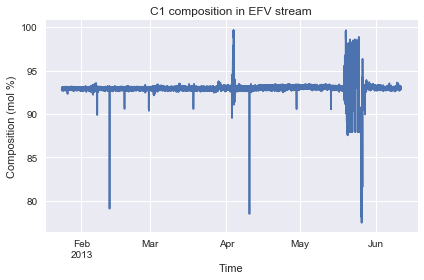

count    19858.000000
mean        93.022404
std          1.107876
min         77.464834
25%         92.847381
50%         92.970462
75%         93.102361
max         99.664235
Name: C1, dtype: float64

In [34]:
xEFVdf['C1'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C1 composition in EFV stream')
plt.tight_layout()
plt.savefig('xEFV_C1.png', dpi = 300)
plt.show()
xEFVdf['C1'].describe()

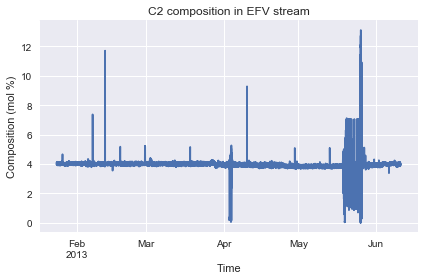

count    19858.000000
mean         3.922133
std          0.668010
min          0.000000
25%          3.880483
50%          3.959802
75%          4.033440
max         13.112778
Name: C2, dtype: float64

In [35]:
xEFVdf['C2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C2 composition in EFV stream')
plt.tight_layout()
plt.savefig('xEFV_C2.png', dpi = 300)
plt.show()
xEFVdf['C2'].describe()

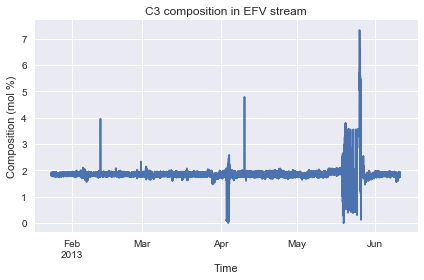

count    19858.000000
mean         1.835461
std          0.354045
min          0.006155
25%          1.791802
50%          1.843891
75%          1.895057
max          7.328309
Name: C3, dtype: float64

In [36]:
xEFVdf['C3'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C3 composition in EFV stream')
plt.tight_layout()
plt.savefig('xEFV_C3.png', dpi = 300)
plt.show()
xEFVdf['C3'].describe()

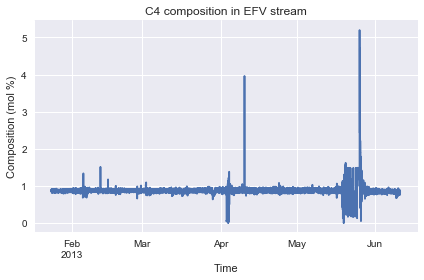

count    19858.000000
mean         0.855311
std          0.168503
min          0.000624
25%          0.835917
50%          0.863701
75%          0.891831
max          5.200099
Name: C4, dtype: float64

In [37]:
xEFVdf['C4'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C4 composition in EFV stream')
plt.tight_layout()
plt.savefig('xEFV_C4.png', dpi = 300)
plt.show()
xEFVdf['C4'].describe()

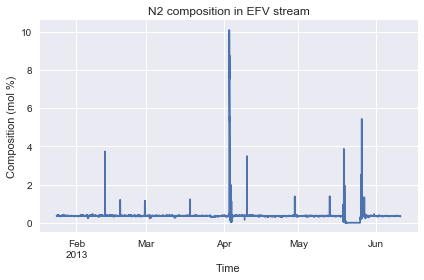

count    19858.000000
mean         0.364690
std          0.344839
min          0.000000
25%          0.351154
50%          0.359717
75%          0.366362
max         10.084449
Name: N2, dtype: float64

In [38]:
xEFVdf['N2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('N2 composition in EFV stream')
plt.tight_layout()
plt.savefig('xEFV_N2.png', dpi = 300)
plt.show()
xEFVdf['N2'].describe()

### DeM streams

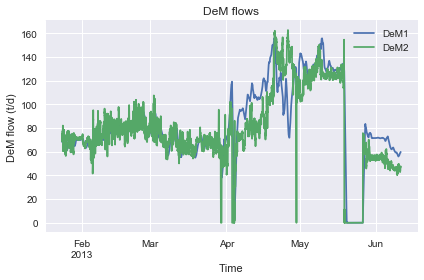

,DeM1,DeM2
count,19872.000000,19872.000000
mean,83.287730,78.453534
std,32.904827,33.603903
min,0.000000,0.000000
25%,66.676641,62.111764
50%,75.540758,73.679789
75%,106.340414,93.722148
max,156.038786,162.898856


In [39]:
# DeM flows plots & descriptors
mdot[['DeM1','DeM2']].plot()
plt.ylabel('DeM flow (t/d)')
plt.title('DeM flows')
plt.tight_layout()
plt.savefig('DeM12.png', dpi = 300)
plt.show()
mdot[['DeM1','DeM2']].describe()

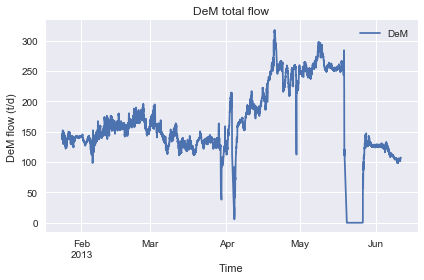

,DeM
count,19872.000000
mean,161.741264
std,64.023955
min,0.000000
25%,128.043325
50%,148.884353
75%,198.355221
max,317.465423


In [40]:
mdot[['DeM']].plot()
plt.ylabel('DeM flow (t/d)')
plt.title('DeM total flow')
plt.tight_layout()
plt.savefig('DeM.png', dpi = 300)
plt.show()
mdot[['DeM']].describe()

In [41]:
NdotDeM = pd.DataFrame(0, index=df.index, columns=species)
NdotDeM['C1'] = mdot['DeM'] / M[0]  # DeM is assumed to be pure C1

In [42]:
NdotDeM.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,8.926946,0,0,0,0
2013-01-24 00:10:00,8.872066,0,0,0,0
2013-01-24 00:20:00,8.887831,0,0,0,0
2013-01-24 00:30:00,8.855684,0,0,0,0
2013-01-24 00:40:00,8.819859,0,0,0,0


In [43]:
NdotDeM.describe()

,C1,C2,C3,C4,N2
count,19872.000000,19872.0,19872.0,19872.0,19872.0
mean,10.082074,0.0,0.0,0.0,0.0
std,3.990906,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0
25%,7.981527,0.0,0.0,0.0,0.0
50%,9.280644,0.0,0.0,0.0,0.0
75%,12.364389,0.0,0.0,0.0,0.0
max,19.789074,0.0,0.0,0.0,0.0


### NG streams, post-leak

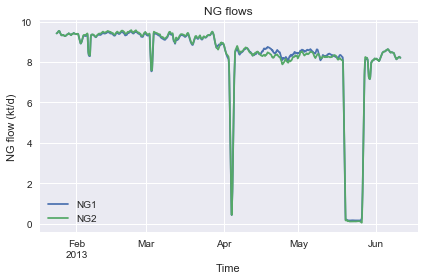

,NG1,NG2
count,19872.000000,19872.000000
mean,8.275968,8.258446
std,2.105936,2.122819
min,0.149396,0.041026
25%,8.345095,8.264217
50%,8.661189,8.619852
75%,9.327948,9.361219
max,9.545838,9.588071


In [44]:
# NG flows plots & descriptors
(mdot[['NG1','NG2']]/1000).plot()
plt.ylabel('NG flow (kt/d)')
plt.title('NG flows')
plt.tight_layout()
plt.savefig('NG12.png', dpi = 300)
plt.show()
(mdot[['NG1','NG2']]/1000).describe()

In [45]:
# Absolute added to ensure positive values
NdotNGchk = np.abs(NdotEFV - NdotDeM)

In [46]:
NdotNGchk.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,977.803978,41.958669,19.129666,8.927354,3.799747
2013-01-24 00:10:00,970.263961,43.209241,20.321517,9.462116,3.822875
2013-01-24 00:20:00,977.432507,41.864875,19.157379,9.038878,3.865275
2013-01-24 00:30:00,969.755745,43.575256,20.307514,9.407125,3.878597
2013-01-24 00:40:00,973.321899,42.222593,19.862881,9.487955,3.835970


In [47]:
mdot['NGchk'] = NdotNGchk @ M

In [48]:
mdot[['NG','NGchk']].head()

,NG,NGchk
Time,,
2013-01-24 00:00:00,18844.288965,18416.893884
2013-01-24 00:10:00,18844.160284,18417.821775
2013-01-24 00:20:00,18844.062464,18417.653945
2013-01-24 00:30:00,18843.880863,18418.421776
2013-01-24 00:40:00,18843.401110,18418.855876


In [49]:
mdot[['NG','NGchk']].describe()

,NG,NGchk
count,19872.000000,19858.000000
mean,16534.414601,16211.227783
std,4227.678699,4293.836555
min,250.149966,7.762986
25%,16627.590190,16249.835936
50%,17228.057939,16855.296481
75%,18689.648856,18268.275141
max,19126.178681,27606.514332


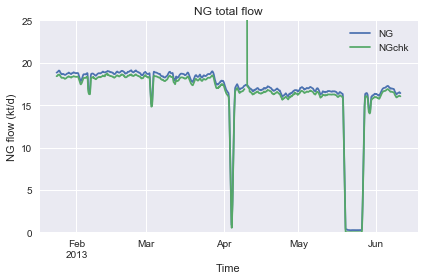

,NG,NGchk
count,19872.000000,19858.000000
mean,16.534415,16.211228
std,4.227679,4.293837
min,0.250150,0.007763
25%,16.627590,16.249836
50%,17.228058,16.855296
75%,18.689649,18.268275
max,19.126179,27.606514


In [50]:
(mdot[['NG','NGchk']]/1000).plot()
plt.ylim((0,25))
plt.ylabel('NG flow (kt/d)')
plt.title('NG total flow')
plt.tight_layout()
plt.savefig('NG.png', dpi = 300)
plt.show()
(mdot[['NG','NGchk']]/1000).describe()

In [51]:
# NG composition is computed via EFV composition estimate
NdotNGchk_sum = NdotNGchk.sum(axis=1)
xNG = np.divide(NdotNGchk, NdotNGchk_sum[:,np.newaxis])

In [52]:
xNG.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,0.929808,0.039899,0.018191,0.008489,0.003613
2013-01-24 00:10:00,0.926638,0.041266,0.019408,0.009037,0.003651
2013-01-24 00:20:00,0.929685,0.039820,0.018222,0.008597,0.003676
2013-01-24 00:30:00,0.926290,0.041622,0.019397,0.008985,0.003705
2013-01-24 00:40:00,0.928095,0.040261,0.018940,0.009047,0.003658


In [53]:
xNG.describe()

,C1,C2,C3,C4,N2
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,0.929470,0.039644,0.018553,0.008646,0.003687
std,0.011128,0.006705,0.003554,0.001694,0.003477
min,0.774648,0.000000,0.000062,0.000006,0.000000
25%,0.927705,0.039287,0.018108,0.008450,0.003552
50%,0.928939,0.040017,0.018637,0.008729,0.003637
75%,0.930253,0.040728,0.019155,0.009017,0.003703
max,0.996613,0.131128,0.073283,0.052001,0.101719


In [54]:
# Data frame for plotting
xNGdf = xNG*100

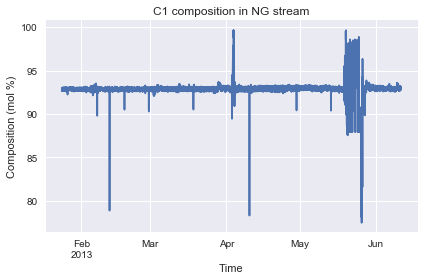

count    19858.000000
mean        92.947008
std          1.112751
min         77.464834
25%         92.770474
50%         92.893920
75%         93.025270
max         99.661315
Name: C1, dtype: float64

In [55]:
xNGdf['C1'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C1 composition in NG stream')
plt.tight_layout()
plt.savefig('xNG_C1.png', dpi = 300)
plt.show()
xNGdf['C1'].describe()

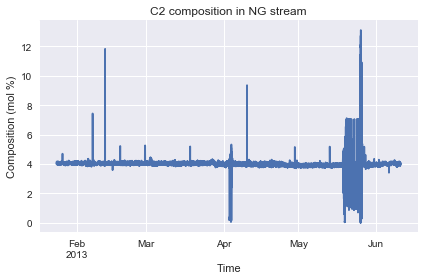

count    19858.000000
mean         3.964425
std          0.670526
min          0.000000
25%          3.928661
50%          4.001740
75%          4.072782
max         13.112778
Name: C2, dtype: float64

In [56]:
xNGdf['C2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C2 composition in NG stream')
plt.tight_layout()
plt.savefig('xNG_C2.png', dpi = 300)
plt.show()
xNGdf['C2'].describe()

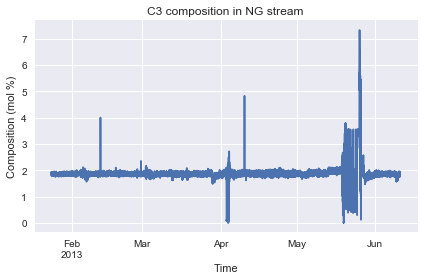

count    19858.000000
mean         1.855283
std          0.355368
min          0.006209
25%          1.810777
50%          1.863706
75%          1.915531
max          7.328309
Name: C3, dtype: float64

In [57]:
xNGdf['C3'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C3 composition in NG stream')
plt.tight_layout()
plt.savefig('xNG_C3.png', dpi = 300)
plt.show()
xNGdf['C3'].describe()

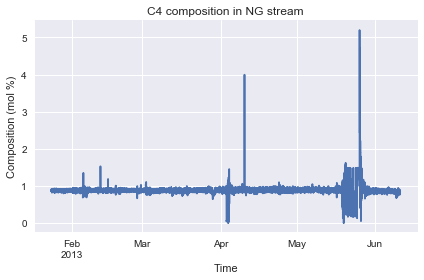

count    19858.000000
mean         0.864579
std          0.169358
min          0.000629
25%          0.844991
50%          0.872868
75%          0.901718
max          5.200099
Name: C4, dtype: float64

In [58]:
xNGdf['C4'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C4 composition in NG stream')
plt.tight_layout()
plt.savefig('xNG_C4.png', dpi = 300)
plt.show()
xNGdf['C4'].describe()

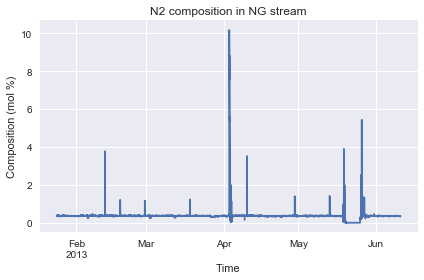

count    19858.000000
mean         0.368705
std          0.347735
min          0.000000
25%          0.355155
50%          0.363656
75%          0.370314
max         10.171947
Name: N2, dtype: float64

In [59]:
xNGdf['N2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('N2 composition in NG stream')
plt.tight_layout()
plt.savefig('xNG_N2.png', dpi = 300)
plt.show()
xNGdf['N2'].describe()

In [60]:
# Computing the average molecular mass
MNG = xNG @ M
# Flatten before division
MNG = np.ndarray.flatten(np.asarray(MNG))
MNG[MNG == 0.0] = 1.0
# Total molar flowrate
NdotNGtot = mdot['NG'] / MNG
# Species molar flowrates
NdotNG = np.multiply(xNG,NdotNGtot[:,np.newaxis])

In [61]:
NdotNG.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,1000.495569,42.932391,19.573602,9.134529,3.887926
2013-01-24 00:10:00,992.723777,44.209455,20.791922,9.681146,3.911367
2013-01-24 00:20:00,1000.062183,42.834138,19.600914,9.248147,3.954764
2013-01-24 00:30:00,992.156763,44.581829,20.776610,9.624426,3.968191
2013-01-24 00:40:00,995.756472,43.195803,20.320710,9.706647,3.924387


In [62]:
NdotNG.describe()

,C1,C2,C3,C4,N2
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,875.818007,37.672365,17.531641,8.217209,3.566937
std,223.385384,10.122303,4.668090,2.209399,2.674052
min,9.312867,0.000000,0.020005,0.002305,0.000000
25%,880.979868,37.260531,17.567311,8.193074,3.397950
50%,913.244866,39.571677,18.706464,8.800747,3.618776
75%,988.956357,42.956349,19.765390,9.271619,3.875875
max,1016.302701,112.092002,40.332559,33.377155,86.914300


### Leak stream

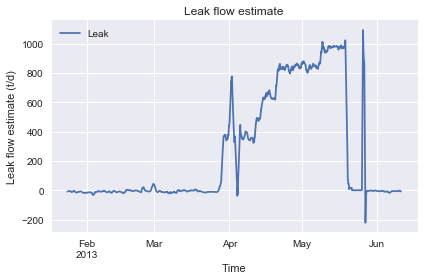

,Leak
count,19872.000000
mean,264.246026
std,373.992612
min,-221.796512
25%,-8.848368
50%,-1.317156
75%,625.782872
max,1091.981079


In [63]:
mdot[['Leak']].plot()
#plt.ylim((0,+1500))
plt.ylabel('Leak flow estimate (t/d)')
plt.title('Leak flow estimate')
plt.tight_layout()
plt.savefig('Leak.png', dpi = 300)
plt.show()
mdot[['Leak']].describe()

In [64]:
# Leak is assumed to be from NG tubes
NdotLeaktot = mdot['Leak']/MNG
NdotLeak = np.multiply(xNG,NdotLeaktot[:,np.newaxis])

In [65]:
NdotLeak.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,-0.507926,-0.021796,-0.009937,-0.004637,-0.001974
2013-01-24 00:10:00,-0.501299,-0.022325,-0.010499,-0.004889,-0.001975
2013-01-24 00:20:00,-0.502844,-0.021538,-0.009856,-0.004650,-0.001989
2013-01-24 00:30:00,-0.496763,-0.022322,-0.010403,-0.004819,-0.001987
2013-01-24 00:40:00,-0.496615,-0.021543,-0.010135,-0.004841,-0.001957


In [66]:
NdotLeak.describe()

,C1,C2,C3,C4,N2
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,13.986688,0.592694,0.284702,0.133258,0.059583
std,19.804839,0.849811,0.411052,0.191514,0.113221
min,-11.781914,-0.510851,-0.254457,-0.112838,-0.074030
25%,-0.468435,-0.020399,-0.009415,-0.004380,-0.001834
50%,-0.070262,-0.003086,-0.001420,-0.000658,-0.000282
75%,33.170320,1.419415,0.669079,0.316175,0.130261
max,57.691203,5.354536,2.677268,1.232649,3.105309


### MRV streams

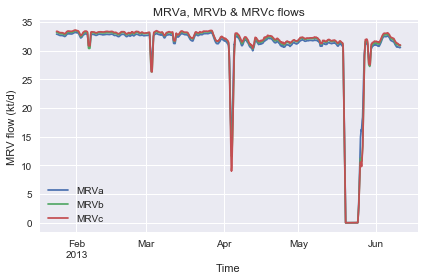

,MRVa,MRVb,MRVc
count,19872.000000,19872.000000,1.987200e+04
mean,30.239852,30.409551,3.053891e+01
std,6.757403,7.024774,7.122995e+00
min,0.000000,0.000000,2.928857e-15
25%,31.176422,31.523557,3.167342e+01
50%,31.869476,32.194248,3.236076e+01
75%,32.735231,33.052427,3.320265e+01
max,33.190717,33.461765,3.360335e+01


In [67]:
# MRV flows plots & descriptors
(mdot[['MRVa','MRVb', 'MRVc']]/1000).plot()
plt.ylabel('MRV flow (kt/d)')
plt.title('MRVa, MRVb & MRVc flows')
plt.tight_layout()
plt.savefig('MRVabc.png', dpi = 300)
plt.show()
(mdot[['MRVa','MRVb', 'MRVc']]/1000).describe()

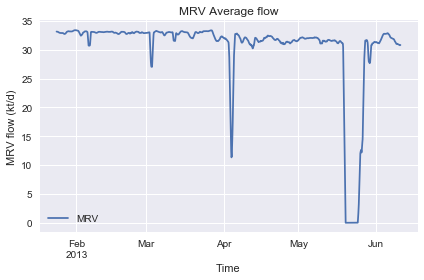

,MRV
count,1.987200e+04
mean,3.039610e+01
std,6.960745e+00
min,9.762857e-16
25%,3.145784e+01
50%,3.213588e+01
75%,3.299605e+01
max,3.341840e+01


In [68]:
(mdot[['MRV']]/1000).plot()
plt.ylabel('MRV flow (kt/d)')
plt.title('MRV Average flow')
plt.tight_layout()
plt.savefig('MRV.png', dpi = 300)
plt.show()
(mdot[['MRV']]/1000).describe()

In [69]:
# MRV Composition: N2, C1, C2 & C3 composition are in mole percent
# C4 composition got revised from ppm to mole percent in the df itself
# Storing the molar compositions
xMRV = df[['xMRVC1', 'xMRVC2', 'xMRVC3', 'xMRVC4', 'xMRVN2']]
xMRV.columns = species
# Composition normalization
sum_xMRV = xMRV.sum(axis=1)
sum_xMRV[sum_xMRV == 0.0] = 100.0
xMRV = np.divide(xMRV, sum_xMRV[:,np.newaxis])
# Computing the average molecular mass
MMRV = xMRV @ M
# Flatten before division
MMRV = np.ndarray.flatten(np.asarray(MMRV))
MMRV[MMRV == 0.0] = 1.0
# Total molar flowrate
NdotMRVtot = mdot['MRV']/MMRV
# Species molar flowrates
NdotMRV = np.multiply(xMRV,NdotMRVtot[:,np.newaxis])

In [70]:
xMRV.describe()

,C1,C2,C3,C4,N2
count,19871.000000,19871.000000,19871.000000,19871.000000,19871.000000
mean,0.516046,0.354903,0.079436,0.004160,0.044801
std,0.102949,0.081029,0.017286,0.001407,0.025182
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.466854,0.344261,0.075180,0.003178,0.030427
50%,0.476096,0.385498,0.082019,0.003759,0.046807
75%,0.533295,0.396158,0.089764,0.005018,0.056948
max,0.938701,0.415728,0.110988,0.015005,0.468732


In [71]:
NdotMRVtot.describe()

count    1.987100e+04
mean     1.272918e+03
std      8.380282e+02
min      5.589192e-14
25%      1.304189e+03
50%      1.333492e+03
75%      1.348627e+03
max      3.217839e+04
Name: MRV, dtype: float64

In [72]:
# Data frame for plotting
xMRVdf = xMRV*100
xMRVdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19872 entries, 2013-01-24 00:00:00 to 2013-06-10 23:50:00
Data columns (total 5 columns):
C1    19871 non-null float64
C2    19871 non-null float64
C3    19871 non-null float64
C4    19871 non-null float64
N2    19871 non-null float64
dtypes: float64(5)
memory usage: 931.5 KB


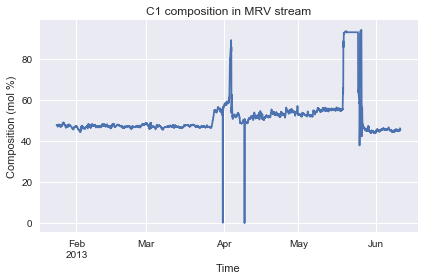

count    19871.000000
mean        51.604599
std         10.294884
min          0.000000
25%         46.685364
50%         47.609619
75%         53.329484
max         93.870050
Name: C1, dtype: float64

In [73]:
xMRVdf['C1'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C1 composition in MRV stream')
plt.tight_layout()
plt.savefig('xMRV_C1.png', dpi = 300)
plt.show()
xMRVdf['C1'].describe()

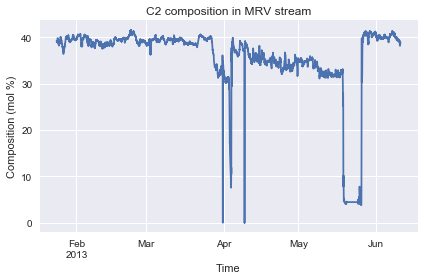

count    19871.000000
mean        35.490259
std          8.102891
min          0.000000
25%         34.426137
50%         38.549840
75%         39.615807
max         41.572793
Name: C2, dtype: float64

In [74]:
xMRVdf['C2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C2 composition in MRV stream')
plt.tight_layout()
plt.savefig('xMRV_C2.png', dpi = 300)
plt.show()
xMRVdf['C2'].describe()

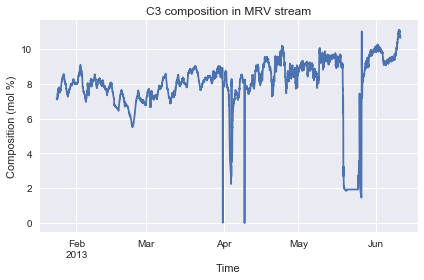

count    19871.000000
mean         7.943632
std          1.728637
min          0.000000
25%          7.517996
50%          8.201861
75%          8.976398
max         11.098809
Name: C3, dtype: float64

In [75]:
xMRVdf['C3'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C3 composition in MRV stream')
plt.tight_layout()
plt.savefig('xMRV_C3.png', dpi = 300)
plt.show()
xMRVdf['C3'].describe()

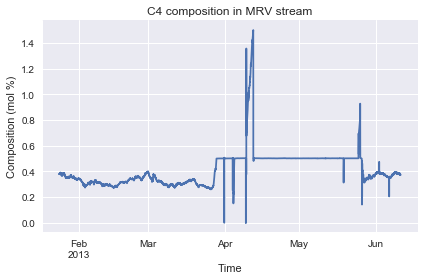

count    19871.000000
mean         0.415975
std          0.140723
min          0.000000
25%          0.317783
50%          0.375929
75%          0.501829
max          1.500475
Name: C4, dtype: float64

In [76]:
xMRVdf['C4'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C4 composition in MRV stream')
plt.tight_layout()
plt.savefig('xMRV_C4.png', dpi = 300)
plt.show()
xMRVdf['C4'].describe()

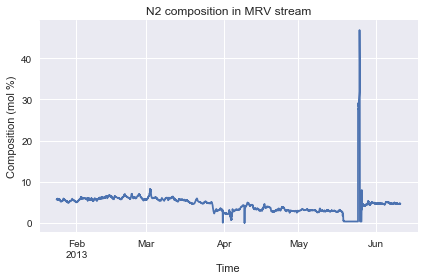

count    19871.000000
mean         4.480113
std          2.518241
min          0.000000
25%          3.042664
50%          4.680730
75%          5.694754
max         46.873168
Name: N2, dtype: float64

In [77]:
xMRVdf['N2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('N2 composition in MRV stream')
plt.tight_layout()
plt.savefig('xMRV_N2.png', dpi = 300)
plt.show()
xMRVdf['N2'].describe()

### LMR streams

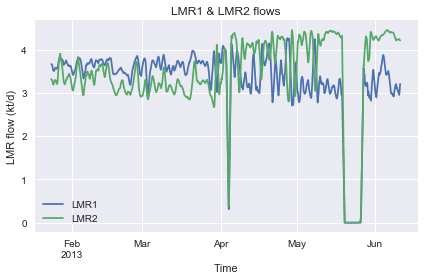

,LMR1,LMR2
count,19872.000000,19872.000000
mean,3.280685,3.425018
std,0.852851,0.964506
min,0.000003,0.002510
25%,3.160395,3.127079
50%,3.509574,3.455504
75%,3.708603,4.159166
max,4.262059,4.450163


In [78]:
# LMR1 & LMR2 flows plots & descriptors
(mdot[['LMR1','LMR2']]/1000).plot()
plt.ylabel('LMR flow (kt/d)')
plt.title('LMR1 & LMR2 flows')
plt.tight_layout()
plt.savefig('LMR12.png', dpi = 300)
plt.show()
(mdot[['LMR1','LMR2']]/1000).describe()

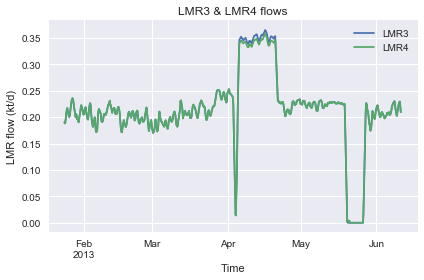

,LMR3,LMR4
count,19872.000000,19872.000000
mean,0.214184,0.213384
std,0.070202,0.068586
min,0.000000,0.000000
25%,0.198231,0.198228
50%,0.212480,0.212475
75%,0.227802,0.227807
max,0.364957,0.357764


In [79]:
# LMR3 & LMR4 flows plots & descriptors
(mdot[['LMR3','LMR4']]/1000).plot()
plt.ylabel('LMR flow (kt/d)')
plt.title('LMR3 & LMR4 flows')
plt.tight_layout()
plt.savefig('LMR34.png', dpi = 300)
plt.show()
(mdot[['LMR3','LMR4']]/1000).describe()

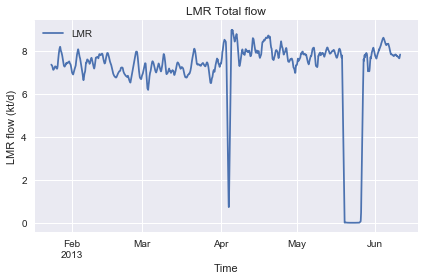

,LMR
count,19872.000000
mean,7.133272
std,1.793651
min,0.002522
25%,7.120005
50%,7.532119
75%,7.890747
max,8.970772


In [80]:
(mdot[['LMR']]/1000).plot()
plt.ylabel('LMR flow (kt/d)')
plt.title('LMR Total flow')
plt.tight_layout()
plt.savefig('LMR.png', dpi = 300)
plt.show()
(mdot[['LMR']]/1000).describe()

In [81]:
# LMR Composition: N2, C1, C2 & C3 composition are in mole percent
# Storing the molar compositions
xLMR = df[['xLMRC1', 'xLMRC2', 'xLMRC3', 'xLMRC4', 'xLMRN2']]
xLMR.columns = species
# Composition normalization
sum_xLMR = xLMR.sum(axis=1)
sum_xLMR[sum_xLMR == 0.0] = 100.0
xLMR = np.divide(xLMR, sum_xLMR[:,np.newaxis])
# Computing the average molecular mass
MLMR = xLMR @ M
# Flatten before division
MLMR = np.ndarray.flatten(np.asarray(MLMR))
MLMR[MLMR == 0.0] = 1.0
# Total molar flowrate
NdotLMRtot = mdot['LMR']/MLMR
# Species molar flowrates
NdotLMR = np.multiply(xLMR,NdotLMRtot[:,np.newaxis])

In [82]:
NdotLMR.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,226.789228,53.643759,2.772053,0.053709,70.877246
2013-01-24 00:10:00,226.760879,53.631701,2.770798,0.053700,70.868709
2013-01-24 00:20:00,226.726383,53.617931,2.769507,0.053691,70.858553
2013-01-24 00:30:00,226.695111,53.604883,2.768296,0.053684,70.850416
2013-01-24 00:40:00,226.660759,53.590826,2.767044,0.053676,70.840725


In [83]:
NdotLMR.describe()

,C1,C2,C3,C4,N2
count,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000
mean,222.898138,53.431779,3.678137,0.077777,63.686840
std,56.792184,14.523449,1.286034,0.053035,16.489062
min,0.116011,0.005573,0.002398,0.000627,0.012547
25%,218.143866,51.551287,2.960872,0.045497,63.743814
50%,230.015821,55.259467,3.622660,0.056945,67.941634
75%,250.535056,59.140893,4.734315,0.105214,70.621232
max,294.844132,79.849935,5.752860,0.486878,82.259619


In [84]:
# Data frame for plotting
xLMRdf = xLMR*100
xLMRdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19872 entries, 2013-01-24 00:00:00 to 2013-06-10 23:50:00
Data columns (total 5 columns):
C1    19872 non-null float64
C2    19872 non-null float64
C3    19872 non-null float64
C4    19872 non-null float64
N2    19872 non-null float64
dtypes: float64(5)
memory usage: 931.5 KB


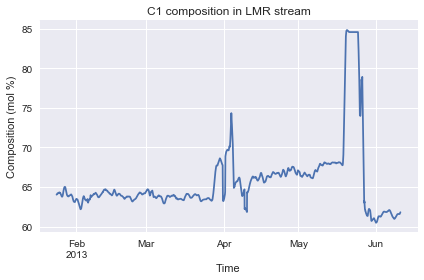

count    19872.000000
mean        65.763729
std          4.578159
min         60.487773
25%         63.581321
50%         64.198744
75%         66.729701
max         84.836587
Name: C1, dtype: float64

In [85]:
xLMRdf['C1'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C1 composition in LMR stream')
plt.tight_layout()
plt.savefig('xLMR_C1.png', dpi = 300)
plt.show()
xLMRdf['C1'].describe()

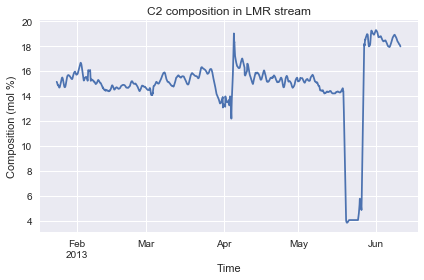

count    19872.000000
mean        14.955179
std          2.753748
min          3.845770
25%         14.670922
50%         15.213249
75%         15.756317
max         19.294968
Name: C2, dtype: float64

In [86]:
xLMRdf['C2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C2 composition in LMR stream')
plt.tight_layout()
plt.savefig('xLMR_C2.png', dpi = 300)
plt.show()
xLMRdf['C2'].describe()

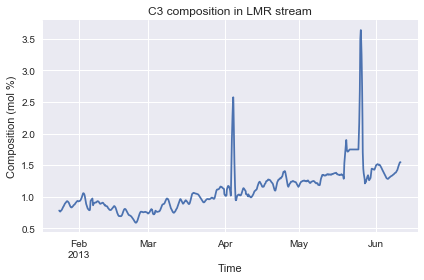

count    19872.000000
mean         1.116842
std          0.345276
min          0.589313
25%          0.886253
50%          1.055106
75%          1.286229
max          3.636164
Name: C3, dtype: float64

In [87]:
xLMRdf['C3'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C3 composition in LMR stream')
plt.tight_layout()
plt.savefig('xLMR_C3.png', dpi = 300)
plt.show()
xLMRdf['C3'].describe()

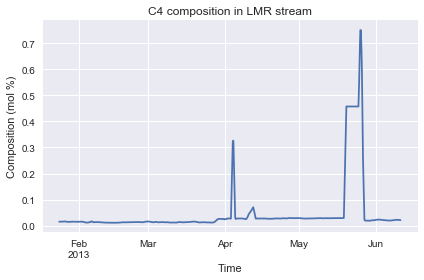

count    19872.000000
mean         0.047874
std          0.108469
min          0.011044
25%          0.013367
50%          0.020408
75%          0.027705
max          0.750530
Name: C4, dtype: float64

In [88]:
xLMRdf['C4'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C4 composition in LMR stream')
plt.tight_layout()
plt.savefig('xLMR_C4.png', dpi = 300)
plt.show()
xLMRdf['C4'].describe()

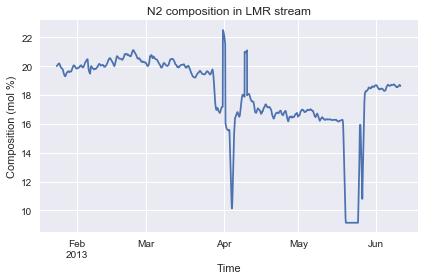

count    19872.000000
mean        18.116377
std          2.618755
min          9.146079
25%         16.753265
50%         18.656699
75%         20.053848
max         22.506418
Name: N2, dtype: float64

In [89]:
xLMRdf['N2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('N2 composition in LMR stream')
plt.tight_layout()
plt.savefig('xLMR_N2.png', dpi = 300)
plt.show()
xLMRdf['N2'].describe()

### BleedL stream

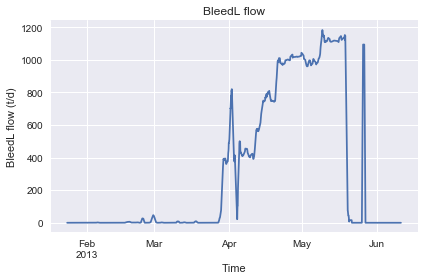

count    19872.000000
mean       316.943897
std        434.189035
min          0.000000
25%          0.000000
50%          1.823790
75%        747.523685
max       1183.307080
Name: BleedL, dtype: float64

In [90]:
# LMR bleed flow plot & descriptors
mdot['BleedL'].plot()
plt.ylabel('BleedL flow (t/d)')
plt.title('BleedL flow')
plt.tight_layout()
plt.savefig('BleedL.png', dpi = 300)
plt.show()
# High LMR bleed periods could be MCHE leak or MR composition correction / purge periods
mdot['BleedL'].describe()
# A nice example where median is an irrelevant descriptor!

In [91]:
NdotBleedLtot = mdot['BleedL']/MLMR
NdotBleedL = np.multiply(xLMR,NdotBleedLtot[:,np.newaxis])

In [92]:
NdotBleedL.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,0.0,0.0,0.0,0.0,0.0
2013-01-24 00:10:00,0.0,0.0,0.0,0.0,0.0
2013-01-24 00:20:00,0.0,0.0,0.0,0.0,0.0
2013-01-24 00:30:00,0.0,0.0,0.0,0.0,0.0
2013-01-24 00:40:00,0.0,0.0,0.0,0.0,0.0


In [93]:
NdotBleedL.describe()

,C1,C2,C3,C4,N2
count,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000
mean,10.415014,2.288879,0.196970,0.006616,2.569021
std,14.330795,3.144116,0.282492,0.021537,3.505812
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.055563,0.013129,0.000683,0.000012,0.017578
75%,24.067693,5.504031,0.445201,0.011077,6.197934
max,45.182823,8.544431,1.751740,0.358481,9.422124


### HMR streams

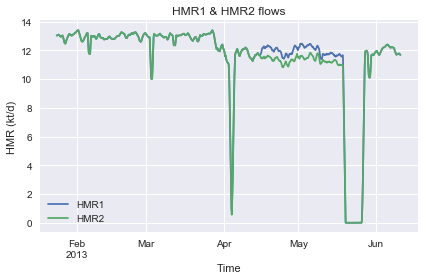

,HMR1,HMR2
count,19872.000000,1.987200e+04
mean,11.604120,1.144758e+01
std,2.988264,2.990115e+00
min,0.000000,2.789813e-14
25%,11.758080,1.140880e+01
50%,12.291584,1.212702e+01
75%,12.988895,1.298861e+01
max,13.418678,1.341902e+01


In [94]:
# HMR flows plots & descriptors
(mdot[['HMR1','HMR2']]/1000).plot()
plt.ylabel('HMR (kt/d)')
plt.title('HMR1 & HMR2 flows')
plt.tight_layout()
plt.savefig('HMR12.png', dpi = 300)
plt.show()
(mdot[['HMR1','HMR2']]/1000).describe()

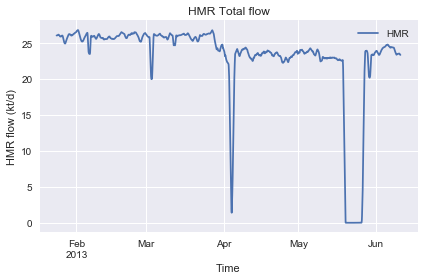

,HMR
count,1.987200e+04
mean,2.305170e+01
std,5.971844e+00
min,2.789813e-14
25%,2.330787e+01
50%,2.426266e+01
75%,2.597785e+01
max,2.683770e+01


In [95]:
(mdot[['HMR']]/1000).plot()
plt.ylabel('HMR flow (kt/d)')
plt.title('HMR Total flow')
plt.tight_layout()
plt.savefig('HMR.png', dpi = 300)
plt.show()
(mdot[['HMR']]/1000).describe()

In [96]:
# HMR Composition: N2, C1, C2 & C3 composition are in mole percent
# Storing the molar compositions
xHMR = df[['xHMRC1', 'xHMRC2', 'xHMRC3', 'xHMRC4', 'xHMRN2']]
xHMR.columns = species
# Composition normalization
sum_xHMR = xHMR.sum(axis=1)
sum_xHMR[sum_xHMR == 0.0] = 100.0
xHMR = np.divide(xHMR, sum_xHMR[:,np.newaxis])
# Computing the average molecular mass
MHMR = xHMR @ M
# Flatten before division
MHMR = np.ndarray.flatten(np.asarray(MHMR))
MHMR[MHMR == 0.0] = 1.0
# Total molar flowrate
NdotHMRtot = mdot['HMR']/MHMR
# Species molar flowrates
NdotHMR = np.multiply(xHMR,NdotHMRtot[:,np.newaxis])

In [97]:
NdotHMR.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,332.969919,497.148007,102.371311,5.452081,34.175693
2013-01-24 00:10:00,333.023312,497.155599,102.346148,5.452224,34.182449
2013-01-24 00:20:00,333.076851,497.157041,102.321033,5.452450,34.189515
2013-01-24 00:30:00,333.130512,497.155412,102.296461,5.452702,34.197185
2013-01-24 00:40:00,333.188568,497.154663,102.271993,5.452931,34.205154


In [98]:
NdotHMR.describe()

,C1,C2,C3,C4,N2
count,1.987200e+04,1.987200e+04,1.987200e+04,1.987200e+04,1.987200e+04
mean,2.880750e+02,4.176854e+02,1.073707e+02,5.837704e+00,2.845050e+01
std,7.905174e+01,1.161862e+02,2.868401e+01,3.081420e+00,1.009861e+01
min,1.108754e-12,5.970376e-14,2.617265e-14,6.935330e-15,1.132799e-13
25%,2.865103e+02,4.017013e+02,1.035193e+02,4.378830e+00,2.485174e+01
50%,3.092675e+02,4.467340e+02,1.142348e+02,5.100649e+00,2.777449e+01
75%,3.289414e+02,4.870905e+02,1.235233e+02,7.325519e+00,3.400735e+01
max,3.654757e+02,5.218950e+02,1.367072e+02,3.202074e+01,8.419577e+01


In [99]:
# Data frame for plotting
xHMRdf = xHMR*100
xHMRdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19872 entries, 2013-01-24 00:00:00 to 2013-06-10 23:50:00
Data columns (total 5 columns):
C1    19872 non-null float64
C2    19872 non-null float64
C3    19872 non-null float64
C4    19872 non-null float64
N2    19872 non-null float64
dtypes: float64(5)
memory usage: 931.5 KB


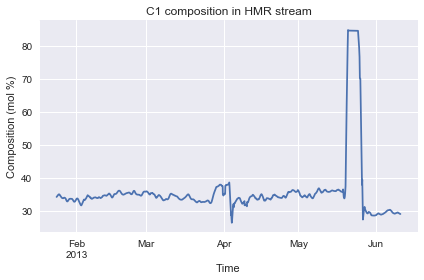

count    19872.000000
mean        35.998917
std          9.872328
min         26.437971
25%         33.360093
50%         34.354278
75%         35.444643
max         84.743125
Name: C1, dtype: float64

In [100]:
xHMRdf['C1'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C1 composition in HMR stream')
plt.tight_layout()
plt.savefig('xHMR_C1.png', dpi = 300)
plt.show()
xHMRdf['C1'].describe()

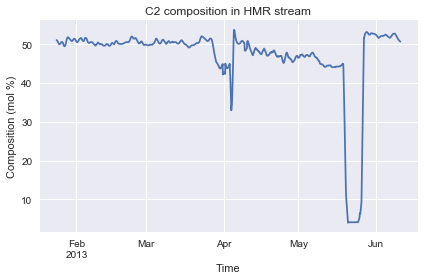

count    19872.000000
mean        46.883844
std          9.883791
min          3.930101
25%         46.930471
50%         50.060181
75%         50.888088
max         53.716462
Name: C2, dtype: float64

In [101]:
xHMRdf['C2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C2 composition in HMR stream')
plt.tight_layout()
plt.savefig('xHMR_C2.png', dpi = 300)
plt.show()
xHMRdf['C2'].describe()

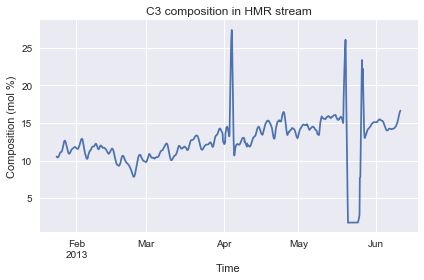

count    19872.000000
mean        12.568465
std          3.159039
min          1.722859
25%         11.203130
50%         12.408696
75%         14.362289
max         27.343499
Name: C3, dtype: float64

In [102]:
xHMRdf['C3'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C3 composition in HMR stream')
plt.tight_layout()
plt.savefig('xHMR_C3.png', dpi = 300)
plt.show()
xHMRdf['C3'].describe()

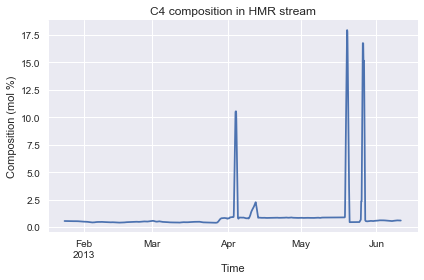

count    19872.000000
mean         0.965872
std          1.887518
min          0.401647
25%          0.463540
50%          0.562195
75%          0.854503
max         17.949452
Name: C4, dtype: float64

In [103]:
xHMRdf['C4'].plot()
plt.ylabel('Composition (mol %)')
plt.title('C4 composition in HMR stream')
plt.tight_layout()
plt.savefig('xHMR_C4.png', dpi = 300)
plt.show()
xHMRdf['C4'].describe()

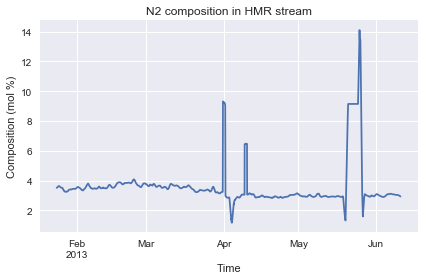

count    19872.000000
mean         3.582902
std          1.479393
min          1.170356
25%          2.950574
50%          3.278294
75%          3.594959
max         14.106106
Name: N2, dtype: float64

In [104]:
xHMRdf['N2'].plot()
plt.ylabel('Composition (mol %)')
plt.title('N2 composition in HMR stream')
plt.tight_layout()
plt.savefig('xHMR_N2.png', dpi = 300)
plt.show()
xHMRdf['N2'].describe()

### BleedH stream

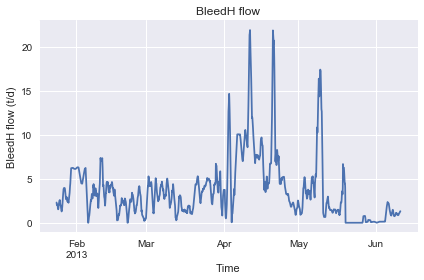

count    19872.000000
mean         3.707832
std          3.540947
min          0.000000
25%          1.321855
50%          2.962810
75%          4.696035
max         21.938880
Name: BleedH, dtype: float64

In [105]:
# HMR bleed flow plot & descriptors
mdot['BleedH'].plot()
plt.ylabel('BleedH flow (t/d)')
plt.title('BleedH flow')
plt.tight_layout()
plt.savefig('BleedH.png', dpi = 300)
plt.show()
# High HMR bleed periods could be MR composition correction / purge periods
mdot['BleedH'].describe()

In [106]:
NdotBleedHtot = mdot['BleedH']/MLMR
NdotBleedH = np.multiply(xHMR,NdotBleedHtot[:,np.newaxis])

In [107]:
NdotBleedH.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,0.037997,0.056732,0.011682,0.000622,0.003900
2013-01-24 00:10:00,0.037701,0.056281,0.011586,0.000617,0.003870
2013-01-24 00:20:00,0.037374,0.055786,0.011481,0.000612,0.003836
2013-01-24 00:30:00,0.037030,0.055262,0.011371,0.000606,0.003801
2013-01-24 00:40:00,0.036685,0.054737,0.011260,0.000600,0.003766


In [108]:
NdotBleedH.describe()

,C1,C2,C3,C4,N2
count,19872.000000,19872.000000,19872.000000,19872.000000,19872.000000
mean,0.061557,0.087113,0.023238,0.001615,0.005872
std,0.059862,0.082499,0.023186,0.002987,0.005587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.021940,0.030990,0.008221,0.000398,0.002095
50%,0.049021,0.070751,0.017007,0.000764,0.004791
75%,0.077845,0.111365,0.030416,0.001518,0.007479
max,0.370817,0.519048,0.144018,0.034773,0.033313


### Vapor make-up streams

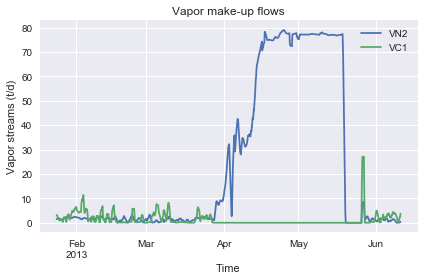

,VN2,VC1
count,19872.000000,19872.000000
mean,23.547240,1.372296
std,32.142976,2.809646
min,0.000000,0.000000
25%,1.175225,0.000000
50%,1.975003,0.084374
75%,65.237660,2.060448
max,79.008164,27.051467


In [109]:
# Vapor make-up flows plots & descriptors
mdot[['VN2','VC1']].plot()
plt.ylabel('Vapor streams (t/d)')
plt.title('Vapor make-up flows')
plt.tight_layout()
plt.savefig('VN2VC1.png', dpi = 300)
plt.show()
mdot[['VN2','VC1']].describe()

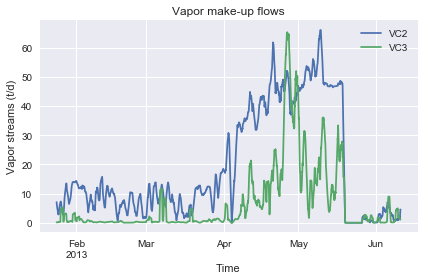

,VC2,VC3
count,19872.000000,19872.000000
mean,19.131389,6.666643
std,18.564108,11.789665
min,0.000000,0.000000
25%,4.606171,0.207518
50%,10.577787,0.901415
75%,38.061155,8.251396
max,66.082069,65.332578


In [110]:
mdot[['VC2', 'VC3']].plot()
plt.ylabel('Vapor streams (t/d)')
plt.title('Vapor make-up flows')
plt.tight_layout()
plt.savefig('VC2VC3.png', dpi = 300)
plt.show()
mdot[['VC2', 'VC3']].describe()

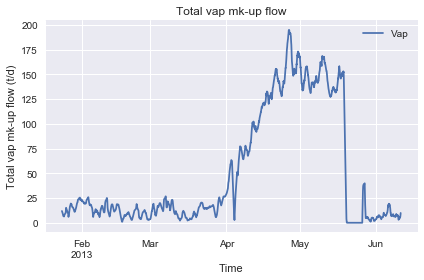

,Vap
count,19872.000000
mean,50.717568
std,58.665841
min,0.000000
25%,8.020698
50%,17.094865
75%,106.828720
max,194.696591


In [111]:
mdot[['Vap']].plot()
plt.ylabel('Total vap mk-up flow (t/d)')
plt.title('Total vap mk-up flow')
plt.tight_layout()
plt.savefig('Vap.png', dpi = 300)
plt.show()
mdot[['Vap']].describe()

In [112]:
NdotVap = pd.DataFrame(0, index=df.index, columns=species)
NdotVap['C1'] = mdot['VC1'] / M[0]
NdotVap['C2'] = mdot['VC2'] / M[1]
NdotVap['C3'] = mdot['VC3'] / M[2]
#NdotVap['C4'] = mdot['VC4'] / M[3]
NdotVap['N2'] = mdot['VN2'] / M[4]

In [113]:
NdotVap.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,0.195292,0.235592,0.003155,0,0.054148
2013-01-24 00:10:00,0.194600,0.233648,0.003155,0,0.054157
2013-01-24 00:20:00,0.193984,0.231924,0.003156,0,0.054188
2013-01-24 00:30:00,0.193441,0.230135,0.003156,0,0.054230
2013-01-24 00:40:00,0.192969,0.228396,0.003156,0,0.054283


In [114]:
NdotVap.describe()

,C1,C2,C3,C4,N2
count,19872.000000,19872.000000,19872.000000,19872.0,19872.000000
mean,0.085541,0.636249,0.151186,0.0,0.840571
std,0.175138,0.617383,0.267366,0.0,1.147414
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.153187,0.004706,0.0,0.041952
50%,0.005259,0.351783,0.020442,0.0,0.070502
75%,0.128437,1.265792,0.187125,0.0,2.328802
max,1.686242,2.197678,1.481612,0.0,2.820370


### Liquid make-up streams

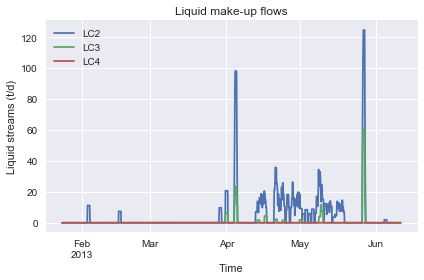

,LC2,LC3,LC4
count,1.987200e+04,19872.000000,19872.0
mean,4.862829e+00,0.825306,0.0
std,1.358604e+01,5.267530,0.0
min,0.000000e+00,0.000000,0.0
25%,2.960595e-16,0.000000,0.0
50%,9.005142e-16,0.000000,0.0
75%,5.637917e+00,0.000000,0.0
max,1.246678e+02,60.304653,0.0


In [115]:
# Liquid make-up flows plot & descriptors
mdot[['LC2','LC3','LC4']].plot()
plt.ylabel('Liquid streams (t/d)')
plt.title('Liquid make-up flows')
plt.tight_layout()
plt.savefig('LiqMkup.png', dpi = 300)
plt.show()
mdot[['LC2','LC3','LC4']].describe()

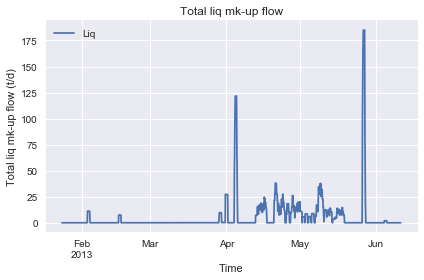

,Liq
count,1.987200e+04
mean,5.688135e+00
std,1.831672e+01
min,0.000000e+00
25%,2.960595e-16
50%,9.005142e-16
75%,5.637917e+00
max,1.849725e+02


In [116]:
mdot[['Liq']].plot()
plt.ylabel('Total liq mk-up flow (t/d)')
plt.title('Total liq mk-up flow')
plt.tight_layout()
plt.savefig('Liq.png', dpi = 300)
plt.show()
mdot[['Liq']].describe()

In [117]:
NdotLiq = pd.DataFrame(0, index=df.index, columns=species)
#NdotLiq['C1'] = mdot['LC1'] / M[0]
NdotLiq['C2'] = mdot['LC2'] / M[1]
NdotLiq['C3'] = mdot['LC3'] / M[2]
NdotLiq['C4'] = mdot['LC4'] / M[3]
#NdotLiq['N2'] = mdot['LN2'] / M[4]

In [118]:
NdotLiq.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,0,2.994822e-17,0.0,0.0,0
2013-01-24 00:10:00,0,2.994822e-17,0.0,0.0,0
2013-01-24 00:20:00,0,2.994822e-17,0.0,0.0,0
2013-01-24 00:30:00,0,2.994822e-17,0.0,0.0,0
2013-01-24 00:40:00,0,2.994822e-17,0.0,0.0,0


In [119]:
NdotLiq.describe()

,C1,C2,C3,C4,N2
count,19872.0,1.987200e+04,19872.000000,19872.0,19872.0
mean,0.0,1.617221e-01,0.018716,0.0,0.0
std,0.0,4.518280e-01,0.119457,0.0,0.0
min,0.0,0.000000e+00,0.000000,0.0,0.0
25%,0.0,9.845990e-18,0.000000,0.0,0.0
50%,0.0,2.994822e-17,0.000000,0.0,0.0
75%,0.0,1.874991e-01,0.000000,0.0,0.0
max,0.0,4.146053e+00,1.367588,0.0,0.0


### MRL stream

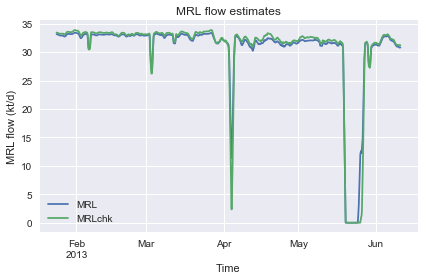

,MRL,MRLchk
count,1.987200e+04,19872.000000
mean,3.040179e+01,30.505627
std,6.957877e+00,7.634285
min,1.019953e-15,0.002522
25%,3.146849e+01,31.804301
50%,3.214595e+01,32.638623
75%,3.299642e+01,33.308605
max,3.341840e+01,33.881496


In [120]:
# MRL estimates & its descriptors
(mdot[['MRL','MRLchk']]/1000).plot()
plt.ylabel('MRL flow (kt/d)')
plt.title('MRL flow estimates')
plt.tight_layout()
plt.savefig('MRL.png', dpi = 300)
plt.show()
(mdot[['MRL','MRLchk']]/1000).describe()

In [121]:
NdotMRL = NdotMRV + NdotLiq

In [122]:
NdotMRL.head()

,C1,C2,C3,C4,N2
Time,,,,,
2013-01-24 00:00:00,646.765886,532.690792,97.698988,5.144801,76.863099
2013-01-24 00:10:00,646.584475,532.929376,97.576444,5.139544,76.901675
2013-01-24 00:20:00,646.634623,532.638193,97.643539,5.146809,77.056248
2013-01-24 00:30:00,646.589833,532.682476,97.658222,5.156705,76.957185
2013-01-24 00:40:00,646.579991,532.643326,97.595451,5.150551,77.077257


In [123]:
NdotMRL.describe()

,C1,C2,C3,C4,N2
count,19871.000000,1.987100e+04,19871.000000,19871.000000,19871.000000
mean,623.157301,4.636644e+02,103.080979,5.141407,57.026687
std,148.069428,1.210401e+02,27.490113,2.092251,22.146730
min,0.000000,3.921986e-16,0.000000,0.000000,0.000000
25%,619.123173,4.537449e+02,100.205412,4.073421,40.235914
50%,636.636122,5.030157e+02,109.083323,4.725135,59.362921
75%,695.961088,5.276144e+02,118.367306,6.635416,75.804798
max,1324.411416,5.602555e+02,134.830769,18.967669,145.050377


### Saving stoichiometric info and species molar flow

In [124]:
np.save('species.npy', species)
np.save('M.npy', M)

In [125]:
NdotEFV.to_pickle('RawEFV.pkl')
NdotNG.to_pickle('RawNG.pkl')
NdotDeM.to_pickle('RawDeM.pkl')
NdotLeak.to_pickle('RawLeak.pkl')
NdotMRV.to_pickle('RawMRV.pkl')
NdotLMR.to_pickle('RawLMR.pkl')
NdotBleedL.to_pickle('RawBleedL.pkl')
NdotHMR.to_pickle('RawHMR.pkl')
NdotBleedH.to_pickle('RawBleedH.pkl')
NdotVap.to_pickle('RawVap.pkl')
NdotLiq.to_pickle('RawLiq.pkl')